In [1]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report,precision_score,f1_score,recall_score
import statsmodels as sm
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
hr=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\WA_Fn-UseC_-HR-Employee-Attrition.csv")
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


So here in thid dataset various inforamtion about employee ,some are categorical data ,most of the numerical data based on the i have to predict Attrition of employee ,so target variable is Attrition ,its a classification problem

In [3]:
#describe method for numerical data overview
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


so 26 column data are numerical values 

In [4]:
#check missing value
hr.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
hr.shape

(1470, 35)

In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

so no missing values in any column lets proceed

In [7]:
hr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [8]:
#see how many unique values present in dataset 
for i in hr.columns:
     print('unique value in',i,'are' ,hr[i].unique())

unique value in Age are [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
unique value in Attrition are ['Yes' 'No']
unique value in BusinessTravel are ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
unique value in DailyRate are [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 

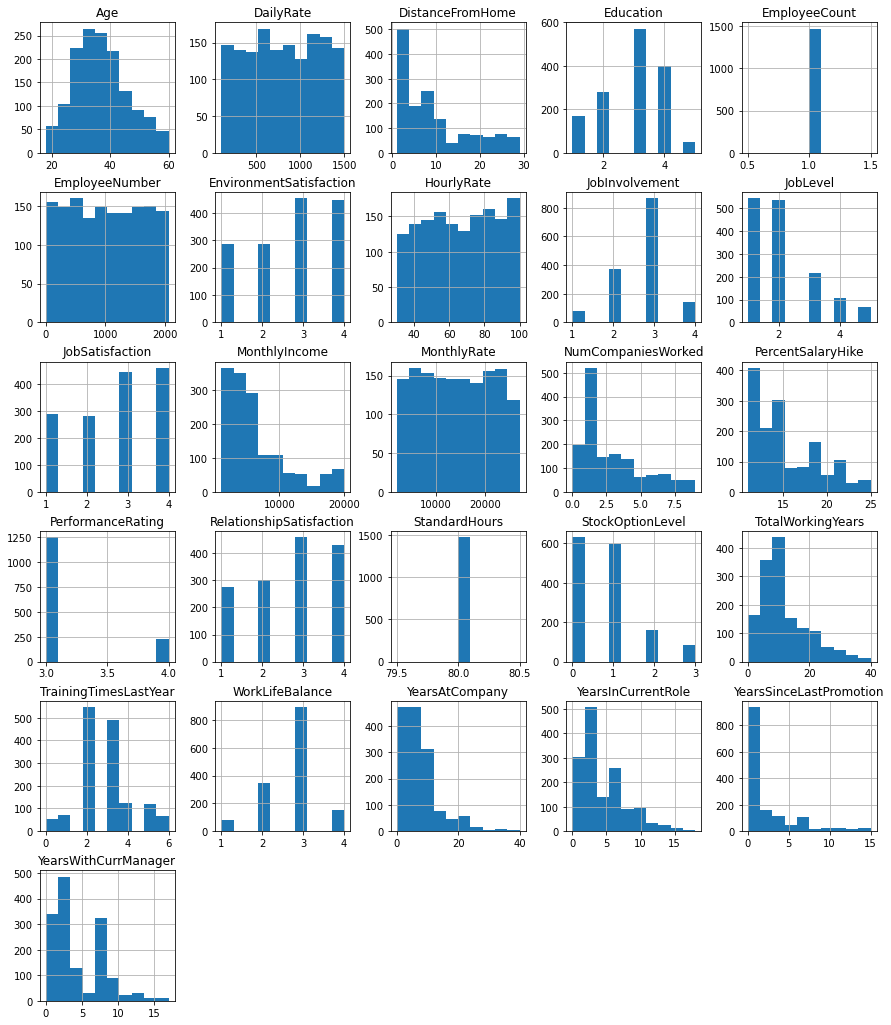

In [9]:
#visualize data distribution and check skewness
hr.hist(figsize=(15,18))
plt.show()

In [10]:
#encoding categorical column using label encoding
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()
for i in hr.columns:
    if hr[i].dtype=="object":
        hr[i]=le.fit_transform(hr[i])

In [12]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


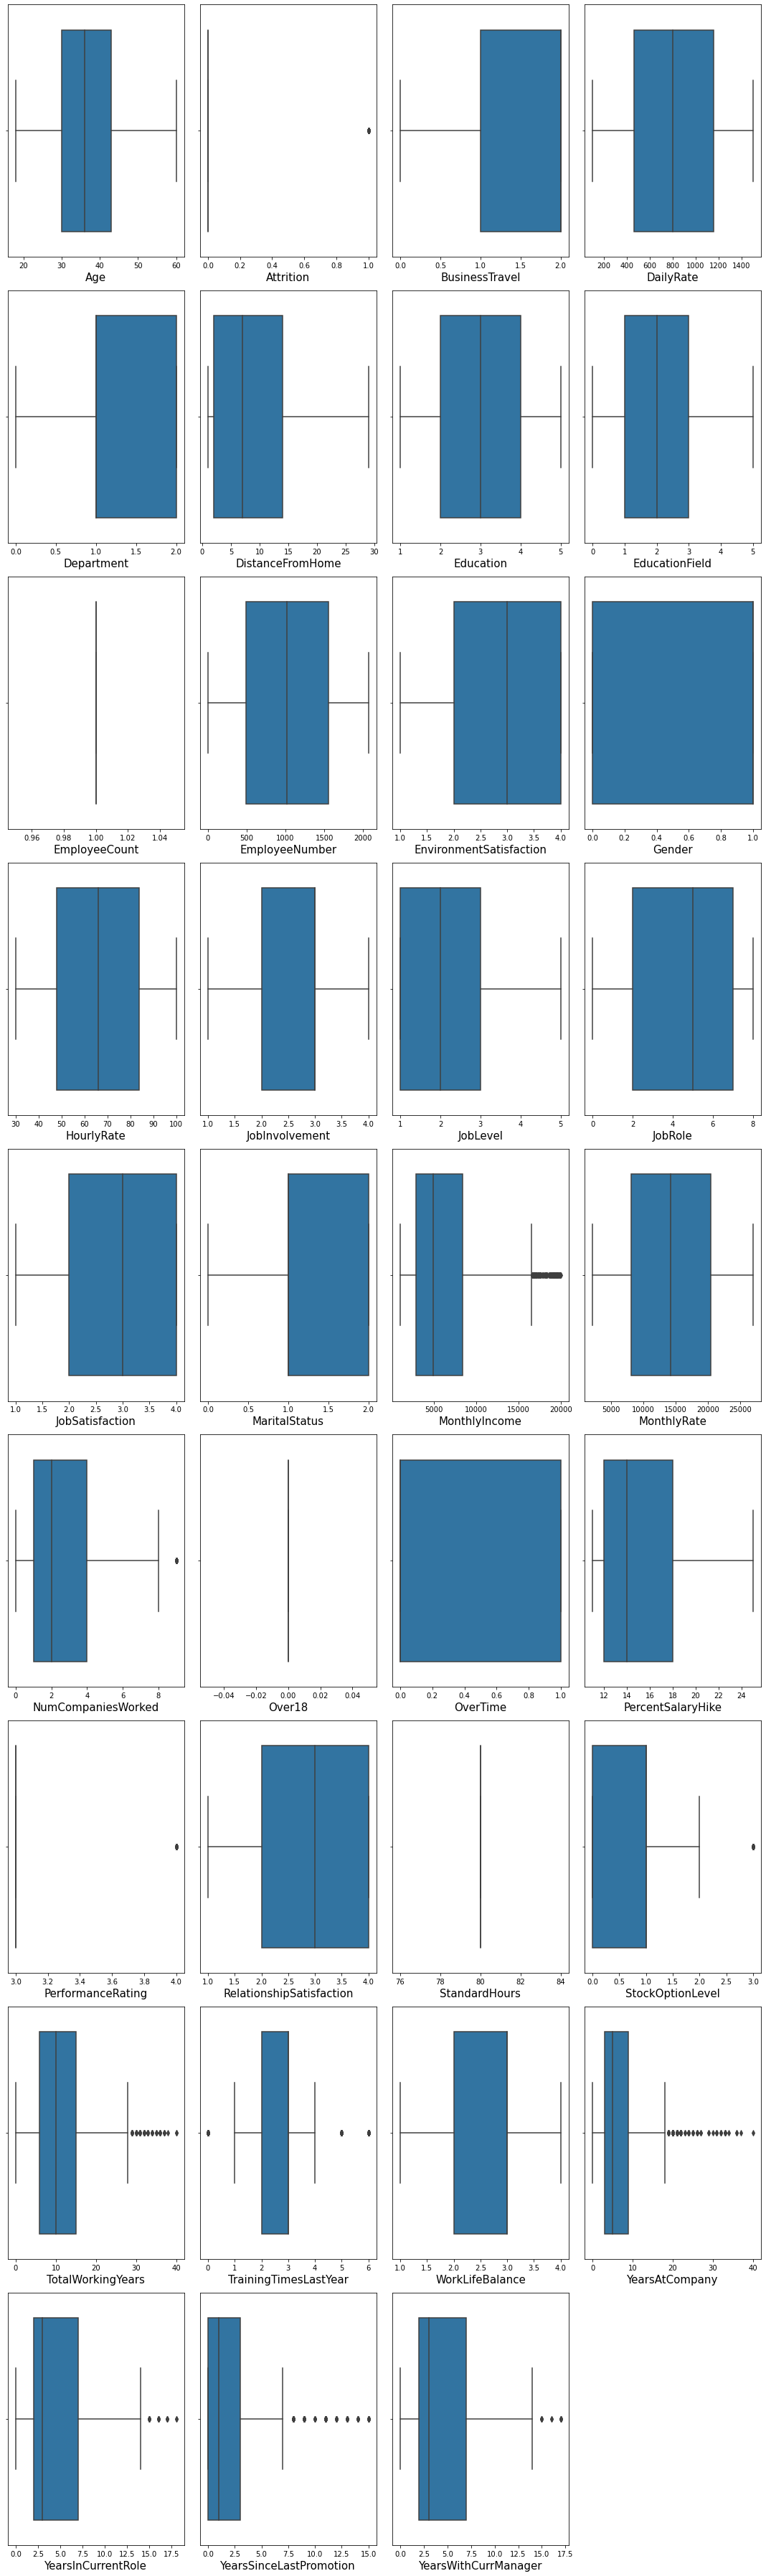

In [13]:
#Visualize the outliers using boxplot
plt.figure(figsize=(15,50))
graph=1
for column in hr:
    if graph<=36:
        ax=plt.subplot(9,4,graph)
        ax=sns.boxplot(hr[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

In [14]:
data=hr.drop("Attrition",axis=1)  # remove target variable so that we can remove outliers in features data

In [15]:
data.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7


In [16]:
#data are mostly right skewd use z score to remove outliers
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(data))
z

array([[0.4463504 , 0.59004834, 0.74252653, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.91319439, 1.2977746 , ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 0.59004834, 1.41436324, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.59004834, 1.60518328, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.91319439, 0.54667746, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.59004834, 0.43256792, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [17]:
print('row number\n', np.where(z>3)[0])
print('column number\n', np.where(z>3)[1])

row number
 [  28   45   62   62   63   64   85   98   98  110  123  123  123  126
  126  126  153  178  187  187  190  190  218  231  231  237  237  270
  270  281  326  386  386  401  411  425  425  427  445  466  473  477
  535  561  561  584  592  595  595  595  616  624  635  653  653  677
  686  701  716  746  749  752  799  838  861  861  875  875  894  914
  914  918  922  926  926  937  956  962  976  976 1008 1024 1043 1078
 1078 1086 1086 1093 1111 1116 1116 1135 1138 1138 1156 1184 1221 1223
 1242 1295 1301 1301 1303 1327 1331 1348 1351 1401 1414 1430]
column number
 [33 32 30 32 31 32 27 27 30 32 31 32 33 27 30 32 33 32 27 33 30 31 32 31
 33 30 32 27 30 31 32 32 33 27 30 30 32 32 27 31 30 30 32 30 33 32 30 27
 30 32 33 27 33 30 32 30 33 32 31 31 30 32 32 32 30 32 32 33 27 30 32 30
 32 32 33 32 27 30 31 32 32 31 27 32 33 30 32 32 30 27 30 30 30 32 32 27
 32 32 32 32 27 32 32 31 32 33 31 27 32 31]


In [18]:
index=np.where(z>3)[0]

In [19]:
hr=hr.drop(hr.index[index])
hr.shape

(1387, 35)

In [20]:
# seprate features and Lable
x=hr.drop(columns='Attrition')
y=hr['Attrition']

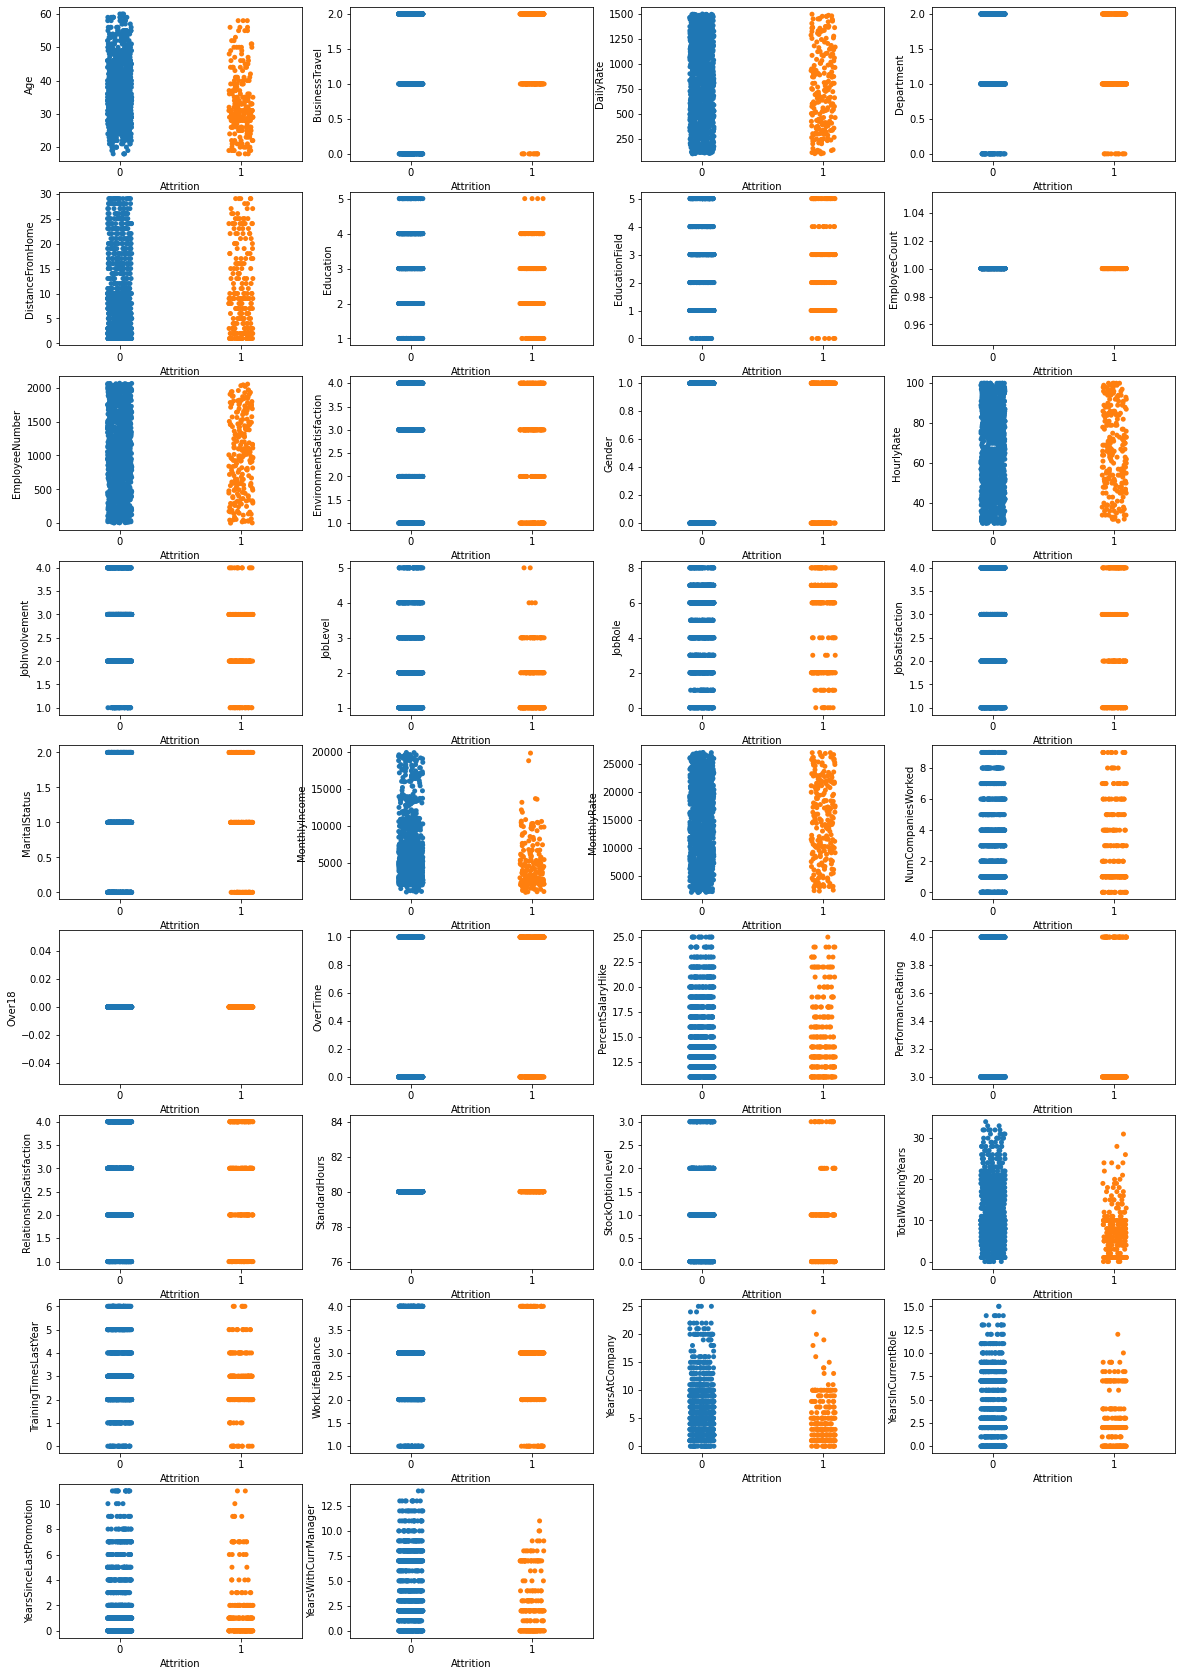

In [21]:
#lets see how features is related to class
plt.figure(figsize=(20,30))
plotnumber=1
for column in x:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()   

In [22]:
hr.value_counts('Attrition') #dataset is imbalanced

Attrition
0    1158
1     229
dtype: int64

In [23]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [24]:
vif=pd.DataFrame() #create empty data frame so that store the vif score
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])] #.shape means [rows,column]
vif['Features']=x.columns    # i will check all A,column vs all the column by(1/1-R^2),B vs all acolumn and so on
vif

,vif,Features
0,1.850575,Age
1,1.014352,BusinessTravel
2,1.031238,DailyRate
3,2.062046,Department
4,1.020177,DistanceFromHome
5,1.063297,Education
6,1.021559,EducationField
7,NaN,EmployeeCount
8,1.022228,EmployeeNumber
9,1.021645,EnvironmentSatisfaction


In [25]:
x.drop(columns=['JobLevel','MonthlyRate'],axis=1) #JobLevel and MonthlyRate have more than 5 score in VIF so i will drop and build model

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [26]:
scaler=StandardScaler() #scale again after removing 2 column
x_scaled=scaler.fit_transform(x)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

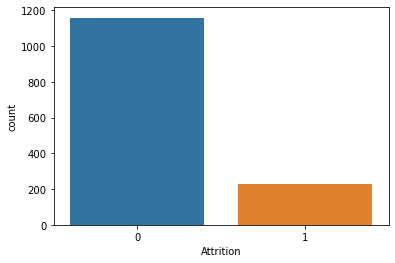

In [27]:
sns.countplot(x='Attrition',data=hr)  # Yes=1,No=0 as per lable encoding 

Our class is imbalanced dataset lets do balance with resampling

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.7,stratify=y)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.7)

In [30]:
from sklearn.utils import resample

In [31]:
x=pd.concat([x_train,y_train],axis=1)

In [32]:
No_attri=x[x.Attrition==0]
Yes_attri=x[x.Attrition==1]

In [33]:
No_attri.shape

(799, 35)

In [34]:
Yes_attri.shape

(171, 35)

In [35]:
#upsamling minority
sampled=resample(Yes_attri,replace=True, #sample with replacement
                   n_samples=len(No_attri), #match number is majority class
                    random_state=27) #reproduciable result

In [36]:
#combine majority and upsamled minority
upsample =pd.concat([sampled,No_attri])

In [37]:
#check new class counts   #upsampling use when dataset is small
upsample.Attrition.value_counts()

1    799
0    799
Name: Attrition, dtype: int64

So our class is balanced now lets build the model

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred=Lr.predict(x_test)

In [41]:
Lr.score(x_test,y_test)

0.8609112709832134

In [42]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       409
           1       0.07      0.50      0.12         8

    accuracy                           0.86       417
   macro avg       0.53      0.68      0.52       417
weighted avg       0.97      0.86      0.91       417



In [43]:
confusion_matrix(y_pred,y_test)

array([[355,  54],
       [  4,   4]], dtype=int64)

# HyperParameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
Lr = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],
               'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [46]:
grid_Lr = GridSearchCV(Lr, param_grid = grid_values,scoring = 'recall')
grid_Lr.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [47]:
#Predict values based on new parameters
y_pred = grid_Lr.predict(x_test)

In [48]:
#New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8609112709832134
Precision Score : 0.5
Recall Score : 0.06896551724137931
F1 Score : 0.1212121212121212


# Descesion Tree model

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred=dt.predict(x_test)

In [52]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.7961630695443646

In [53]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[306,  53],
       [ 32,  26]], dtype=int64)

In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       338
           1       0.45      0.33      0.38        79

    accuracy                           0.80       417
   macro avg       0.65      0.62      0.63       417
weighted avg       0.78      0.80      0.78       417



# Hyperparamter tuning

In [55]:
#we are tuning three hyperparameter right now,we are pasing the diffrent values for both parameters
grid_param={'criterion':['gini','entropy'], #gini and entropy for classification use 'mse' for regression in criterion
           'max_depth': range(2,10,3),
           'min_samples_leaf':range(1,10,2),
           'min_samples_split':range(2,10,2)}

In [56]:
#cv= cross validation ,n_jobs menas apply entire CPU to do the job so that in increase process speed
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1) 

In [57]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [58]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [59]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1,min_samples_split=2)

In [60]:
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.8298969072164949

In [61]:
y_pred=dt.predict(x_test)

In [62]:
#classification report post tuning
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       376
           1       0.38      0.54      0.44        41

    accuracy                           0.87       417
   macro avg       0.66      0.72      0.68       417
weighted avg       0.89      0.87      0.88       417



In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf=RandomForestClassifier()

In [70]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
rf.score(x_test,y_test)

0.8752997601918465

# Hyperparameter Tuning

In [74]:
param={'n_estimators':[50,100,150],
    'criterion':['gini','entropy'],
    'max_depth':range(2,16,2),
    'min_samples_split':range(1,12,2),
    'min_samples_leaf':range(1,10,2),
    
}

In [76]:
grid_search=GridSearchCV(rf,param_grid=param,cv=5)

In [77]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 16, 2),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(1, 12, 2),
                         'n_estimators': [50, 100, 150]})

In [78]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

In [79]:
rf=RandomForestClassifier(criterion='gini',max_depth=10,min_samples_leaf=1,min_samples_split=5,n_estimators=150)

In [80]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9731958762886598

In [82]:
y_pred=rf.predict(x_test)

In [83]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       401
           1       0.19      0.69      0.30        16

    accuracy                           0.88       417
   macro avg       0.59      0.79      0.61       417
weighted avg       0.96      0.88      0.91       417



In [85]:
confusion_matrix(y_pred,y_test)

array([[354,  47],
       [  5,  11]], dtype=int64)

Lets plot AUC ROC score plot and chose among best model

In [87]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

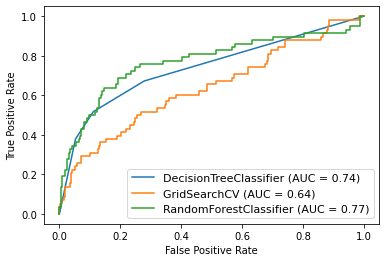

In [86]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(grid_Lr,x_test,y_test, ax=disp.ax_) #ax_ is axis with confusion matrix  ,it is way that combine other confusion mt
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [89]:
#saving model RandomForestclassifier
import pickle
file='pikle_rf_model'
with open(file ,'wb') as file:
    pickle.dump(rf, file) 